In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sessionmaker import Market

[-170.81479983825312, -499.8938750758035, -356.25, -475.0, -593.75, -712.5, -831.25, -950.0, -1068.75, -1187.5, -1306.25, -1425.0, -1543.75, -2275.0, -2350.0, -1900.0, -2018.75, -2137.5, -2256.25, -3250.0, -3325.0, -3575.0, -3650.0, -2850.0, -4062.5, -4137.5, -4037.5, -3981.25, -3646.590909090909, -3168.75, -2786.3636363636365, -1280.0, -1162.5]
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
[5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0, 160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0, 200.0, 205.0, 210.0, 215.0, 220.0, 225.0, 230.0, 235.0, 240.0, 245.0, 250.0, 255.0, 260.0, 265.0, 270.0, 275.0, 280.0, 285.0, 290.0, 295.0, 300.0, 305.0, 310.0, 315.0, 320.0, 325.0, 330.0, 335.0, 340.0, 345.0, 350.0, 355.0, 360.0, 365.0, 370.0, 375.0, 380.0, 385.

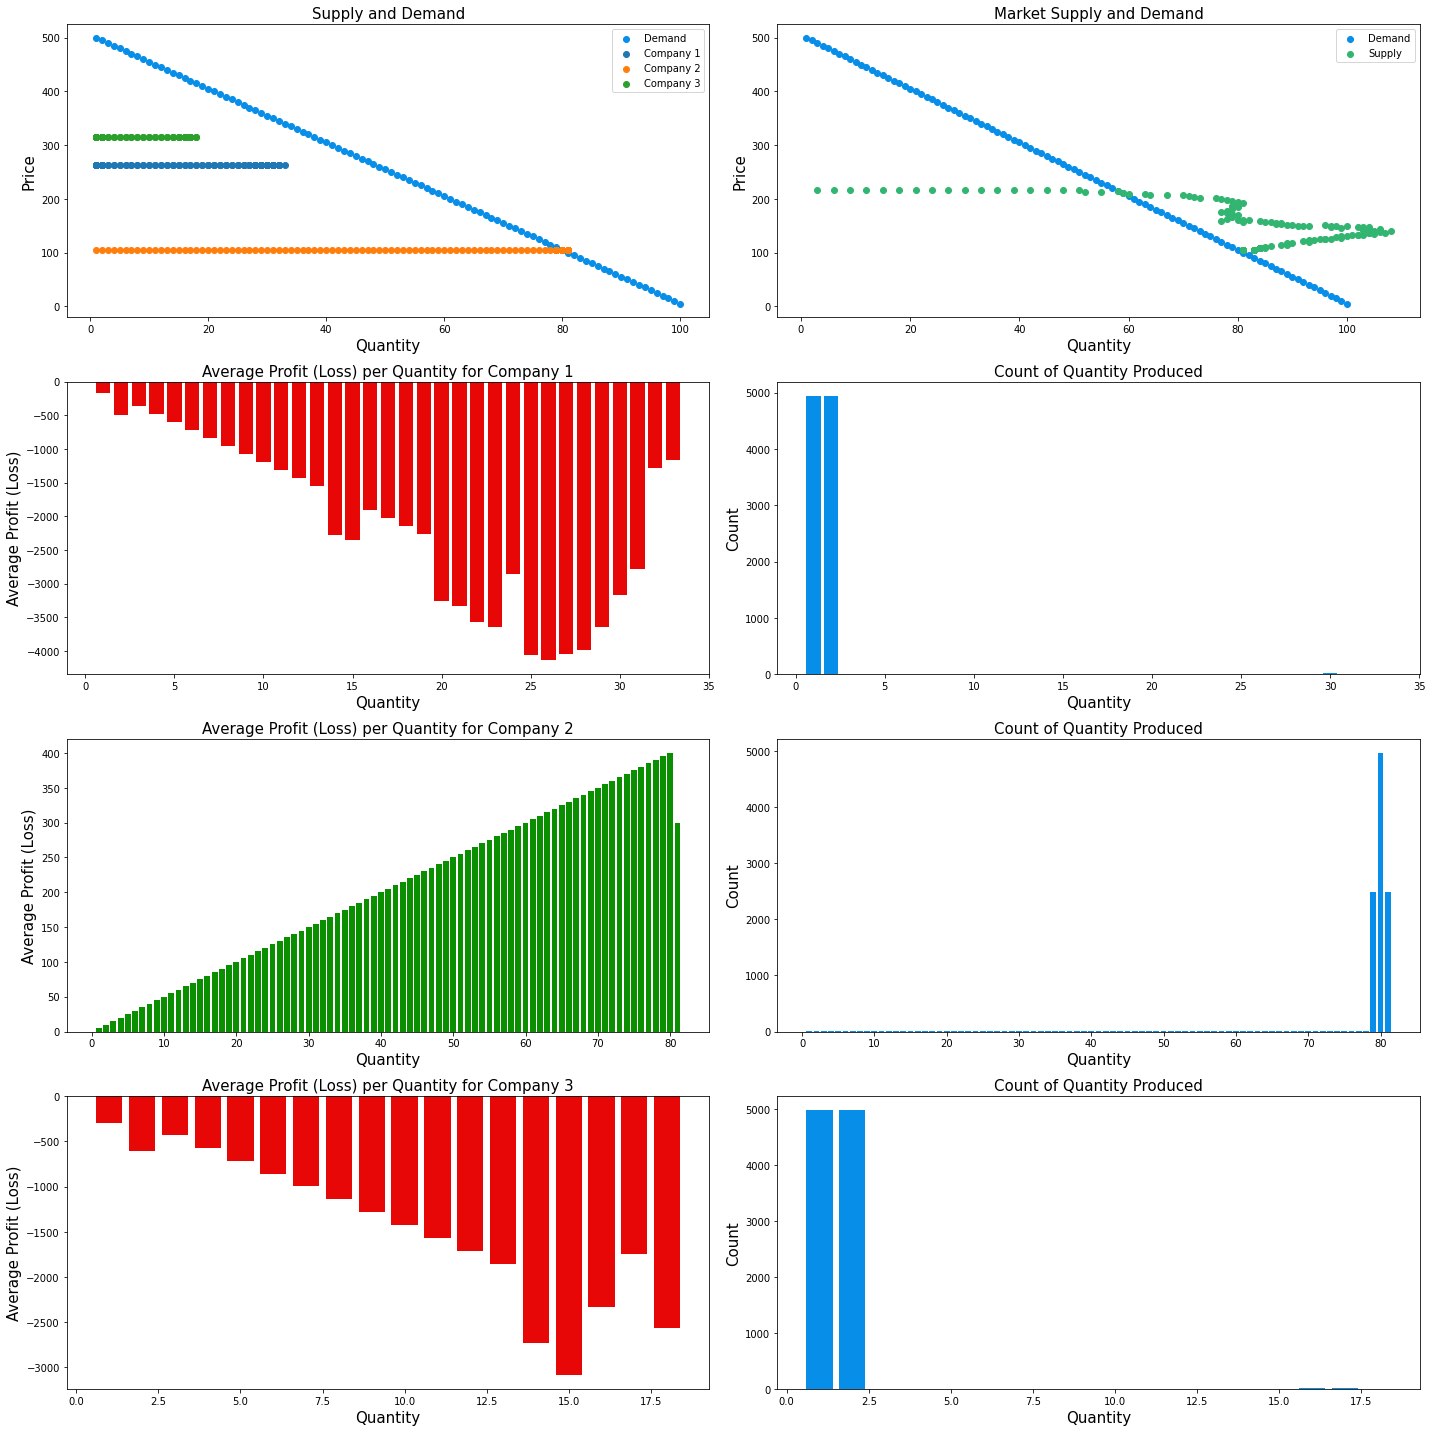

In [2]:
def competition_experiment(market_class):
    # Data extraction for each company:
    market_data = {}
    for seller in market_class.sellers:
        market_data.update({seller: {'Quantity Sold': [], 'Price per Item': [], 'Profits': {}, 'Profit Margin': market_class.sellers[seller]['Profit Margin']}})
    
    general_data = {'Total Quantity': [], 'Average Price': []}

    # Profit Simplification
    competitors = market_data.keys()
    
    for i in range(10000):
        total_quantity = 0
        price_sum = 0
        for seller in competitors:
            instance_data = market_class.sellers[seller]
            current_quantity = instance_data['Quantity']
            costs = instance_data['Costs']

            market_data[seller]['Quantity Sold'].append(current_quantity)
            market_data[seller]['Price per Item'].append((costs(current_quantity)/current_quantity)*market_data[seller]['Profit Margin'])

            total_quantity += current_quantity
            price_sum += (costs(current_quantity))
        
        general_data['Total Quantity'].append(total_quantity)
        general_data['Average Price'].append(price_sum/total_quantity)
        
        market_class.session()
        
        for seller in competitors:
            instance_data = market_class.sellers[seller]
            current_quantity = market_data[seller]['Quantity Sold'][-1]
            if current_quantity not in market_data[seller]['Profits']:
                market_data[seller]['Profits'][current_quantity] = []
            market_data[seller]['Profits'][current_quantity].append(instance_data['Previous Profit'])

    # Profit Simplification
    for seller in competitors:
        quantities = market_data[seller]['Profits'].keys()
        for quantity in quantities:
            count = len(market_data[seller]['Profits'][quantity])
            average = sum(market_data[seller]['Profits'][quantity])/count

            market_data[seller]['Profits'][quantity] = (count, average)

    
    # Buyer Prices
    buyer_prices = np.array(sorted(market_class.buyer_prices)[::-1])
    buyer_quantities = [i + 1 for i in range(len(buyer_prices))]

    # Suplot Definition
    fig, axs = plt.subplots(1 + len(competitors), 2, facecolor='#ffffff')
    fig.set_figwidth(20)
    fig.set_figheight(20)

    # Supply and Demand Curve
    axs[0][0].scatter(buyer_quantities, buyer_prices, label='Demand',c='#078ee8')
    for seller in market_data:
        axs[0][0].scatter(market_data[seller]['Quantity Sold'], market_data[seller]['Price per Item'], label=seller)

    axs[0][0].set_title('Supply and Demand', fontsize=15, color='#000000')
    axs[0][0].set_xlabel('Quantity', fontsize=15, color='#000000')
    axs[0][0].set_ylabel('Price', fontsize=15, color='#000000')

    axs[0][0].legend()

    # Average Curve
    axs[0][1].scatter(buyer_quantities, buyer_prices, label='Demand',c='#078ee8')
    axs[0][1].scatter(general_data['Total Quantity'], general_data['Average Price'], label='Supply', c='#33b572')

    axs[0][1].set_title('Market Supply and Demand', fontsize=15, color='#000000')
    axs[0][1].set_xlabel('Quantity', fontsize=15, color='#000000')
    axs[0][1].set_ylabel('Price', fontsize=15, color='#000000')

    axs[0][1].legend()

    # Quantity
    for i, competitor in enumerate(competitors):
        # Quantity v. Profits
        quantities = market_data[competitor]['Profits'].keys()
        prices = [val[1] for val in market_data[competitor]['Profits'].values()]
        colors = ['#0a8f00' if i >= 0 else '#e80707' for i in prices]
        axs[i+1][0].bar(quantities, prices, color=colors)
        print(prices)
        print(quantities)
        axs[i+1][0].set_title(f'Average Profit (Loss) per Quantity for {competitor}', fontsize=15, color='#000000')
        axs[i+1][0].set_xlabel('Quantity', fontsize=15, color='#000000')
        axs[i+1][0].set_ylabel('Average Profit (Loss)', fontsize=15, color='#000000')
        
        # Quantity v Instance
        counts = [val[0] for val in market_data[competitor]['Profits'].values()]
        axs[i+1][1].bar(quantities, counts, color='#078ee8')

        axs[i+1][1].set_title('Count of Quantity Produced', fontsize=15, color='#000000')
        axs[i+1][1].set_xlabel('Quantity', fontsize=15, color='#000000')
        axs[i+1][1].set_ylabel('Count', fontsize=15, color='#000000')
    
    plt.tight_layout()
    plt.show()
    
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 1', lambda q: 250*q, 1.05)
m1.add_seller('Company 2', lambda q: 100*q, 1.05)
m1.add_seller('Company 3', lambda q: 300*q, 1.05)
competition_experiment(m1)